# <span style="color:green"> CHAPTER 8 : RESTRUCTURING DATA INTO A TIDY FORM </span>

> ```All the datasets used in the preceding chapters have not had much or any work done tonchange their structure. We immediately began processing the datasets in their original shape.```

> ```Many datasets in the wild will need a significant amount of restructuring before commencing a more detailed analysis.```

>> ```In some cases, an entire project might only be concerned with formatting the data in such a way that it can be easily processed by someone else.```

> 1. The variable names are labels, such as gender, race, salary, and position. 

> 2. The variable values are those things liable to change for every observation, such as male/female for gender or white/black for race. 

> 3. A single observation is the collection of all variable values for a single observational unit.

```It is important to understand that tidying data does not typically involve changing the
values of your dataset, filling in missing values, or doing any sort of analysis.```

>> ```The main tidy tools that pandas has available for you are the DataFrame
methods stack, melt, unstack, and pivot.```

### 5 common types of messy data

1. Column names are values, not variable names
2. Multiple variables are stored in column names
3. Variables are stored in both rows and columns
4. Multiple types of observational units are stored in the same table
5. A single observational unit is stored in multiple tables

## Tidying variable values as column names with stack

In [3]:
#understand the differences between tidy and messy data
url = "https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/state_fruit.csv"
state_fruit = pd.read_csv(url, index_col= 0)
state_fruit

,Apple,Orange,Banana
Texas,12,10,40
Arizona,9,7,12
Florida,0,14,190


In [3]:
state_fruit.dtypes

Apple     int64
Orange    int64
Banana    int64
dtype: object

```There does not appear to be anything messy about this table, and the information is easily
consumable.```

> ```However, according to the tidy principles, it isn't actually tidy. Each column name is actually the value of a variable. In fact, none of the variable names are even present in the DataFrame.```

In [5]:
#One of the first steps to transform a messy dataset into tidy data is to identify all of the variables.

# The stack method takes all of the column names and reshapes them to be vertical as a single index level:
state_fruit.stack()

Texas    Apple      12
         Orange     10
         Banana     40
Arizona  Apple       9
         Orange      7
         Banana     12
Florida  Apple       0
         Orange     14
         Banana    190
dtype: int64

In [6]:
#Notice that we now have a Series with a MultiIndex. There are now two levels in the index.
#Let's use the reset_index method to turn the result into a DataFrame:

state_fruit_tidy = state_fruit.stack().reset_index()
state_fruit_tidy

,level_0,level_1,0
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


In [7]:
#Everything is more tidy now. We just need to change the name of the columns
state_fruit_tidy.columns = ['state', 'fruit', 'weight']
state_fruit_tidy

,state,fruit,weight
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


In [10]:
#get it back to how it was before
fruit_pivot = state_fruit_tidy.pivot(index='state', columns='fruit', values='weight')
fruit_pivot.reset_index().rename_axis(None, axis='columns')

,state,Apple,Banana,Orange
0,Arizona,9,12,7
1,Florida,0,190,14
2,Texas,12,40,10


## Tidying variable values as column names with melt

In [7]:
#todo lo antetior se puede hacer mas sencillo con .melt(). Solo necesitamos que el DF no este indexada
url = "https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/state_fruit2.csv"
state_fruit2 = pd.read_csv(url)
state_fruit2

,State,Apple,Orange,Banana
0,Texas,12,10,40
1,Arizona,9,7,12
2,Florida,0,14,190


In [8]:
state_fruit2.melt(id_vars= ['State'], value_vars= ['Apple', 'Orange', 'Banana'])

,State,variable,value
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


In [9]:
#We can even change the names of the columns inside the melt function
state_fruit2.melt(id_vars= ['State'], value_vars= ['Apple', 'Orange', 'Banana'], var_name = "Fruit", value_name='Weight')

,State,Fruit,Weight
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


In [10]:
just_string = state_fruit2.melt(id_vars='State')
just_string

,State,variable,value
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


## Stacking multiple groups of variables simultaneously

In [14]:
url = "https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/movie.csv"
movie = pd.read_csv(url)
movie

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
4912,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
4913,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
4914,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [15]:
actor = movie[['movie_title', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes',
               'actor_2_facebook_likes', 'actor_3_facebook_likes']]
actor.head()

,movie_title,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes
0,Avatar,CCH Pounder,Joel David Moore,Wes Studi,1000.0,936.0,855.0
1,Pirates of the Caribbean: At World's End,Johnny Depp,Orlando Bloom,Jack Davenport,40000.0,5000.0,1000.0
2,Spectre,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11000.0,393.0,161.0
3,The Dark Knight Rises,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000.0,23000.0,23000.0
4,Star Wars: Episode VII - The Force Awakens,Doug Walker,Rob Walker,NaN,131.0,12.0,NaN


In [16]:
#We will be using the versatile wide_to_long function to reshape our data into tidy form. 

#To use this function, we will need to change the column names that we are stacking.

def change_col_name(col_name):
    col_name = col_name.replace('_name', '')
    if 'facebook' in col_name:
        fb_idx = col_name.find('facebook')
        col_name = col_name[:5] + col_name[fb_idx - 1:] + col_name[5:fb_idx-1]
    return col_name

In [17]:
actor2 = actor.rename(columns=change_col_name)
actor2

,movie_title,actor_1,actor_2,actor_3,actor_facebook_likes_1,actor_facebook_likes_2,actor_facebook_likes_3
0,Avatar,CCH Pounder,Joel David Moore,Wes Studi,1000.0,936.0,855.0
1,Pirates of the Caribbean: At World's End,Johnny Depp,Orlando Bloom,Jack Davenport,40000.0,5000.0,1000.0
2,Spectre,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11000.0,393.0,161.0
3,The Dark Knight Rises,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000.0,23000.0,23000.0
4,Star Wars: Episode VII - The Force Awakens,Doug Walker,Rob Walker,NaN,131.0,12.0,NaN
...,...,...,...,...,...,...,...
4911,Signed Sealed Delivered,Eric Mabius,Daphne Zuniga,Crystal Lowe,637.0,470.0,318.0
4912,The Following,Natalie Zea,Valorie Curry,Sam Underwood,841.0,593.0,319.0
4913,A Plague So Pleasant,Eva Boehnke,Maxwell Moody,David Chandler,0.0,0.0,0.0
4914,Shanghai Calling,Alan Ruck,Daniel Henney,Eliza Coupe,946.0,719.0,489.0


In [13]:
#Use the wide_to_long function to stack the actor and Facebook sets of columns simultaneously:
stubs = ['actor', 'actor_facebook_likes']

actor_tidy = pd.wide_to_long(actor2, stubnames= stubs, i= ['movie_title'], j= 'actor_num', sep= '_')
actor_tidy

#in this case i would be the val_names from the melt function and j would be the val_values

,,actor,actor_facebook_likes
movie_title,actor_num,,
Avatar,1,CCH Pounder,1000.0
Pirates of the Caribbean: At World's End,1,Johnny Depp,40000.0
Spectre,1,Christoph Waltz,11000.0
The Dark Knight Rises,1,Tom Hardy,27000.0
Star Wars: Episode VII - The Force Awakens,1,Doug Walker,131.0
...,...,...,...
Signed Sealed Delivered,3,Crystal Lowe,318.0
The Following,3,Sam Underwood,319.0
A Plague So Pleasant,3,David Chandler,0.0


## Inverting stacked data

In [14]:
use_col = lambda x: 'UGDS_' in x or x== "INSTNM"
url = "https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/college.csv"
college = pd.read_csv(url, index_col= 'INSTNM', usecols= use_col)
college.head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137


```Use the stack method to convert each horizontal column name into a vertical index level:```

In [20]:
college_stacked = college.stack() #returns a series
college_stacked.head()

INSTNM                              
Alabama A & M University  UGDS_WHITE    0.0333
                          UGDS_BLACK    0.9353
                          UGDS_HISP     0.0055
                          UGDS_ASIAN    0.0019
                          UGDS_AIAN     0.0024
dtype: float64

In [21]:
# Invert this stacked data back to its original form with the unstack Series method
college_stacked.unstack().head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137


In [22]:
#A similar sequence of operations can be done with melt followed by pivot.
college2 = pd.read_csv(url, usecols= use_col)
college2.head()

,INSTNM,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
0,Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
1,University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
2,Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
3,University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
4,Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137


In [23]:
#dont use the value_vars = paramenter since it can identify it
college_melt = college2.melt( id_vars= 'INSTNM', var_name= 'Race', value_name= 'Porcentage')
college_melt

,INSTNM,Race,Porcentage
0,Alabama A & M University,UGDS_WHITE,0.0333
1,University of Alabama at Birmingham,UGDS_WHITE,0.5922
2,Amridge University,UGDS_WHITE,0.2990
3,University of Alabama in Huntsville,UGDS_WHITE,0.6988
4,Alabama State University,UGDS_WHITE,0.0158
...,...,...,...
67810,SAE Institute of Technology San Francisco,UGDS_UNKN,NaN
67811,Rasmussen College - Overland Park,UGDS_UNKN,NaN
67812,National Personal Training Institute of Cleveland,UGDS_UNKN,NaN
67813,Bay Area Medical Academy - San Jose Satellite ...,UGDS_UNKN,NaN


In [24]:
# lo contrario de un melt es un pivot
melted_inv = college_melt.pivot(index='INSTNM', columns='Race', values='Porcentage')
melted_inv

Race,UGDS_2MOR,UGDS_AIAN,UGDS_ASIAN,UGDS_BLACK,UGDS_HISP,UGDS_NHPI,UGDS_NRA,UGDS_UNKN,UGDS_WHITE
INSTNM,,,,,,,,,
A & W Healthcare Educators,0.0000,0.0000,0.0000,0.9750,0.0250,0.0000,0.0000,0.0000,0.0000
A T Still University of Health Sciences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABC Beauty Academy,0.0000,0.0000,0.9333,0.0333,0.0333,0.0000,0.0000,0.0000,0.0000
ABC Beauty College Inc,0.0000,0.0000,0.0000,0.6579,0.0526,0.0000,0.0000,0.0000,0.2895
AI Miami International University of Art and Design,0.0018,0.0000,0.0018,0.0198,0.4773,0.0000,0.0025,0.4644,0.0324
...,...,...,...,...,...,...,...,...,...
Yukon Beauty College Inc,0.0000,0.1200,0.0000,0.0400,0.0000,0.0400,0.0000,0.0000,0.8000
Z Hair Academy,0.0211,0.0000,0.0000,0.0000,0.0211,0.0105,0.0000,0.0105,0.9368
Zane State College,0.0218,0.0029,0.0029,0.0296,0.0029,0.0005,0.0000,0.2399,0.6995


In [26]:
melted_inv.reset_index() #this sets the dataframe as sa normal one but not in the exact same place as when we imported it

Race,INSTNM,UGDS_2MOR,UGDS_AIAN,UGDS_ASIAN,UGDS_BLACK,UGDS_HISP,UGDS_NHPI,UGDS_NRA,UGDS_UNKN,UGDS_WHITE
0,A & W Healthcare Educators,0.0000,0.0000,0.0000,0.9750,0.0250,0.0000,0.0000,0.0000,0.0000
1,A T Still University of Health Sciences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABC Beauty Academy,0.0000,0.0000,0.9333,0.0333,0.0333,0.0000,0.0000,0.0000,0.0000
3,ABC Beauty College Inc,0.0000,0.0000,0.0000,0.6579,0.0526,0.0000,0.0000,0.0000,0.2895
4,AI Miami International University of Art and D...,0.0018,0.0000,0.0018,0.0198,0.4773,0.0000,0.0025,0.4644,0.0324
...,...,...,...,...,...,...,...,...,...,...
7530,Yukon Beauty College Inc,0.0000,0.1200,0.0000,0.0400,0.0000,0.0400,0.0000,0.0000,0.8000
7531,Z Hair Academy,0.0211,0.0000,0.0000,0.0000,0.0211,0.0105,0.0000,0.0105,0.9368
7532,Zane State College,0.0218,0.0029,0.0029,0.0296,0.0029,0.0005,0.0000,0.2399,0.6995
7533,duCret School of Arts,0.0976,0.0000,0.0732,0.1951,0.1463,0.0000,0.0000,0.0244,0.4634


In [25]:
# Notice that the institution names are now shuttled over into the index and are not
# in their ***original*** order. The column names are not in their original order.

#just get the order of the columns from the original database
college2_replication = melted_inv.loc[college2['INSTNM'], college2.columns[1:]].reset_index()
college2_replication

,INSTNM,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
0,Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
1,University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
2,Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
3,University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
4,Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137
...,...,...,...,...,...,...,...,...,...,...
7530,SAE Institute of Technology San Francisco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7531,Rasmussen College - Overland Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7532,National Personal Training Institute of Cleveland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7533,Bay Area Medical Academy - San Jose Satellite ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# There is actually a very simple way to transpose a DataFrame that don't require stack or
# unstack by using the transpose method or the T attribute like
college.transpose()

INSTNM,Alabama A & M University,University of Alabama at Birmingham,Amridge University,University of Alabama in Huntsville,Alabama State University,The University of Alabama,Central Alabama Community College,Athens State University,Auburn University at Montgomery,Auburn University,...,Strayer University-North Dallas,Strayer University-San Antonio,Strayer University-Stafford,WestMed College - Merced,Vantage College,SAE Institute of Technology San Francisco,Rasmussen College - Overland Park,National Personal Training Institute of Cleveland,Bay Area Medical Academy - San Jose Satellite Location,Excel Learning Center-San Antonio South
UGDS_WHITE,0.0333,0.5922,0.2990,0.6988,0.0158,0.7825,0.7255,0.7823,0.5328,0.8507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UGDS_BLACK,0.9353,0.2600,0.4192,0.1255,0.9208,0.1119,0.2613,0.1200,0.3376,0.0704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UGDS_HISP,0.0055,0.0283,0.0069,0.0382,0.0121,0.0348,0.0044,0.0191,0.0074,0.0248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UGDS_ASIAN,0.0019,0.0518,0.0034,0.0376,0.0019,0.0106,0.0025,0.0053,0.0221,0.0227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UGDS_AIAN,0.0024,0.0022,0.0000,0.0143,0.0010,0.0038,0.0044,0.0157,0.0044,0.0074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UGDS_NHPI,0.0019,0.0007,0.0000,0.0002,0.0006,0.0009,0.0000,0.0010,0.0016,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UGDS_2MOR,0.0000,0.0368,0.0000,0.0172,0.0098,0.0261,0.0000,0.0174,0.0297,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UGDS_NRA,0.0059,0.0179,0.0000,0.0332,0.0243,0.0268,0.0000,0.0057,0.0397,0.0100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UGDS_UNKN,0.0138,0.0100,0.2715,0.0350,0.0137,0.0026,0.0019,0.0334,0.0246,0.0140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Unstacking after a groupby aggregation

In [15]:
url = "https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/employee.csv"
employee = pd.read_csv(url)
employee.groupby('RACE')['BASE_SALARY'].mean().astype(int)

RACE
American Indian or Alaskan Native    60272
Asian/Pacific Islander               61660
Black or African American            50137
Hispanic/Latino                      52345
Others                               51278
White                                64419
Name: BASE_SALARY, dtype: int32

In [16]:
agg = employee.groupby(['RACE', 'GENDER'])['BASE_SALARY'].mean().astype(int)
agg.head()

RACE                               GENDER
American Indian or Alaskan Native  Female    60238
                                   Male      60305
Asian/Pacific Islander             Female    63226
                                   Male      61033
Black or African American          Female    48915
Name: BASE_SALARY, dtype: int32

In [18]:
# it would be easier to compare male versus female salaries for each race if they were side by side 
# and not vertical as they are now. Let's unstack the gender index level:
agg.unstack('GENDER')

GENDER,Female,Male
RACE,,
American Indian or Alaskan Native,60238,60305
Asian/Pacific Islander,63226,61033
Black or African American,48915,51082
Hispanic/Latino,46503,54782
Others,63785,38771
White,66793,63940


In [25]:
agg.unstack('RACE')

RACE,American Indian or Alaskan Native,Asian/Pacific Islander,Black or African American,Hispanic/Latino,Others,White
GENDER,,,,,,
Female,60238,63226,48915,46503,63785,66793
Male,60305,61033,51082,54782,38771,63940


In [26]:
agg2 = employee.groupby(['RACE', 'GENDER'])['BASE_SALARY'].agg(['mean', 'max', 'min']).astype(int)
agg2

mean     max    min
RACE                              GENDER                      
American Indian or Alaskan Native Female  60238   98536  26125
                                  Male    60305   81239  26125
Asian/Pacific Islander            Female  63226  130416  26125
                                  Male    61033  163228  27914
Black or African American         Female  48915  150416  24960
                                  Male    51082  275000  26125
Hispanic/Latino                   Female  46503  126115  26125
                                  Male    54782  165216  26104
Others                            Female  63785   63785  63785
                                  Male    38771   38771  38771
White                             Female  66793  178331  27955
                                  Male    63940  210588  26125

In [27]:
agg2.unstack('GENDER')

mean            max            min       
GENDER                            Female   Male  Female    Male Female   Male
RACE                                                                         
American Indian or Alaskan Native  60238  60305   98536   81239  26125  26125
Asian/Pacific Islander             63226  61033  130416  163228  26125  27914
Black or African American          48915  51082  150416  275000  24960  26125
Hispanic/Latino                    46503  54782  126115  165216  26125  26104
Others                             63785  38771   63785   38771  63785  38771
White                              66793  63940  178331  210588  27955  26125

## Renaming axis levels for easy reshaping

In [27]:
url = "https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/college.csv"
college = pd.read_csv(url, index_col= 'INSTNM')
college.head()

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,4206.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,11383.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,291.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,5451.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,4811.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


In [29]:
cg = college.groupby(['STABBR', 'RELAFFIL'])['UGDS', 'SATMTMID'].agg(['size', 'min', 'max']).head(6)
cg

C:\Users\MSI\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


UGDS                 SATMTMID              
                size    min      max     size    min    max
STABBR RELAFFIL                                            
AK     0           7  109.0  12865.0        7    NaN    NaN
       1           3   27.0    275.0        3  503.0  503.0
AL     0          72   12.0  29851.0       72  420.0  590.0
       1          24   13.0   3033.0       24  400.0  560.0
AR     0          68   18.0  21405.0       68  427.0  565.0
       1          18   20.0   4485.0       18  495.0  600.0

In [30]:
cg = cg.rename_axis(['AGG_COLS', 'AGG_FUNCS'], axis='columns')
cg

AGG_COLS        UGDS                 SATMTMID              
AGG_FUNCS       size    min      max     size    min    max
STABBR RELAFFIL                                            
AK     0           7  109.0  12865.0        7    NaN    NaN
       1           3   27.0    275.0        3  503.0  503.0
AL     0          72   12.0  29851.0       72  420.0  590.0
       1          24   13.0   3033.0       24  400.0  560.0
AR     0          68   18.0  21405.0       68  427.0  565.0
       1          18   20.0   4485.0       18  495.0  600.0

In [31]:
cg.stack('AGG_FUNCS').head()

AGG_COLS                      UGDS  SATMTMID
STABBR RELAFFIL AGG_FUNCS                   
AK     0        size           7.0       7.0
                min          109.0       NaN
                max        12865.0       NaN
       1        size           3.0       3.0
                min           27.0     503.0

In [32]:
# By default, stacking places the new column level in the innermost position. Use
# the swaplevel method to switch the placement of the levels:

cg.stack('AGG_FUNCS').swaplevel('AGG_FUNCS', 'STABBR', axis='index').head()

,,AGG_COLS,UGDS,SATMTMID
AGG_FUNCS,RELAFFIL,STABBR,,
size,0,AK,7.0,7.0
min,0,AK,109.0,NaN
max,0,AK,12865.0,NaN
size,1,AK,3.0,3.0
min,1,AK,27.0,503.0


## Tidying when multiple variables are stored as column values

```Tidy datasets must have a single column for each variable. Occasionally, multiple variable
names are placed in a single column with their corresponding value placed in another. The
general format for this kind of messy data is as follows:```

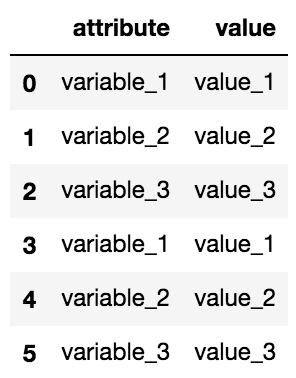

In [33]:
url = "https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/restaurant_inspections.csv"
inspections = pd.read_csv(url, parse_dates=['Date'])
inspections.head()

,Name,Date,Info,Value
0,E & E Grill House,2017-08-08,Borough,MANHATTAN
1,E & E Grill House,2017-08-08,Cuisine,American
2,E & E Grill House,2017-08-08,Description,Non-food contact surface improperly constructe...
3,E & E Grill House,2017-08-08,Grade,A
4,E & E Grill House,2017-08-08,Score,9.0


In [34]:
# This dataset has two variables, Name and Date, that are each correctly contained
# in a single column. The Info column itself has five different variables: Borough,
# Cuisine, Description, Grade, and Score. We need to pivot these ones.

inspections = inspections.pivot(index=['Name', 'Date'], columns= 'Info', values= 'Value')

In [35]:
inspections

,Info,Borough,Cuisine,Description,Grade,Score
Name,Date,,,,,
3 STAR JUICE CENTER,2017-05-10,BROOKLYN,"Juice, Smoothies, Fruit Salads",Facility not vermin proof. Harborage or condit...,A,12.0
A & L PIZZA RESTAURANT,2017-08-22,BROOKLYN,Pizza,Facility not vermin proof. Harborage or condit...,A,9.0
AKSARAY TURKISH CAFE AND RESTAURANT,2017-07-25,BROOKLYN,Turkish,Plumbing not properly installed or maintained;...,A,13.0
ANTOJITOS DELI FOOD,2017-06-01,BROOKLYN,"Latin (Cuban, Dominican, Puerto Rican, South &...",Live roaches present in facility's food and/or...,A,10.0
BANGIA,2017-06-16,MANHATTAN,Korean,Covered garbage receptacle not provided or ina...,A,9.0
...,...,...,...,...,...,...
VALL'S PIZZERIA,2017-03-15,STATEN ISLAND,Pizza/Italian,Wiping cloths soiled or not stored in sanitizi...,A,9.0
VIP GRILL,2017-06-12,BROOKLYN,Jewish/Kosher,Hot food item not held at or above 140Âº F.,A,10.0
WAHIZZA,2017-04-13,MANHATTAN,Pizza,"No facilities available to wash, rinse and san...",A,10.0


```we have to move that info 0 level index. because is just one, we can just reset the index instead 
of using the get_level_values```

In [36]:
inspectionse = inspections.reset_index(inplace=True)
inspections

Info,Name,Date,Borough,Cuisine,Description,Grade,Score
0,3 STAR JUICE CENTER,2017-05-10,BROOKLYN,"Juice, Smoothies, Fruit Salads",Facility not vermin proof. Harborage or condit...,A,12.0
1,A & L PIZZA RESTAURANT,2017-08-22,BROOKLYN,Pizza,Facility not vermin proof. Harborage or condit...,A,9.0
2,AKSARAY TURKISH CAFE AND RESTAURANT,2017-07-25,BROOKLYN,Turkish,Plumbing not properly installed or maintained;...,A,13.0
3,ANTOJITOS DELI FOOD,2017-06-01,BROOKLYN,"Latin (Cuban, Dominican, Puerto Rican, South &...",Live roaches present in facility's food and/or...,A,10.0
4,BANGIA,2017-06-16,MANHATTAN,Korean,Covered garbage receptacle not provided or ina...,A,9.0
...,...,...,...,...,...,...,...
95,VALL'S PIZZERIA,2017-03-15,STATEN ISLAND,Pizza/Italian,Wiping cloths soiled or not stored in sanitizi...,A,9.0
96,VIP GRILL,2017-06-12,BROOKLYN,Jewish/Kosher,Hot food item not held at or above 140Âº F.,A,10.0
97,WAHIZZA,2017-04-13,MANHATTAN,Pizza,"No facilities available to wash, rinse and san...",A,10.0
98,WANG MANDOO HOUSE,2017-08-29,QUEENS,Korean,Accurate thermometer not provided in refrigera...,A,12.0


## Tidying when two or more values are stored in the same cell

```Use the str accessor to parse these strings into separate columns to tidy the data.```

In [24]:
url = "https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/texas_cities.csv"
cities = pd.read_csv(url, index_col='City')
cities

,Geolocation
City,
Houston,"29.7604° N, 95.3698° W"
Dallas,"32.7767° N, 96.7970° W"
Austin,"30.2672° N, 97.7431° W"


In [25]:
#Let's split the Geolocation column into four separate columns:
geolocations = cities.Geolocation.str.split(pat = '. ', expand = True) #expands makes it into a dataframe
geolocations.columns = ['latitude', 'latitude direction','longitude', 'longitude direction']
geolocations

,latitude,latitude direction,longitude,longitude direction
City,,,,
Houston,29.7604,N,95.3698,W
Dallas,32.7767,N,96.7970,W
Austin,30.2672,N,97.7431,W


In [26]:
geolocations.reset_index()

,City,latitude,latitude direction,longitude,longitude direction
0,Houston,29.7604,N,95.3698,W
1,Dallas,32.7767,N,96.7970,W
2,Austin,30.2672,N,97.7431,W


In [39]:
#but...they are objects...
geolocations.dtypes

latitude               object
latitude direction     object
longitude              object
longitude direction    object
dtype: object

In [40]:
#Because the original data type for the Geolocation was an object, all the new columns are also objects
geolocations = geolocations.astype({'latitude': 'float', 'longitude':'float'})
geolocations.dtypes

latitude               float64
latitude direction      object
longitude              float64
longitude direction     object
dtype: object

In [41]:
#We could have done the astype function in another way. 
geolocations.apply(pd.to_numeric, errors='ignore')

,latitude,latitude direction,longitude,longitude direction
0,29.7604,N,95.3698,W
1,32.7767,N,96.7970,W
2,30.2672,N,97.7431,W


```The easiest way is to use the split method. We pass it a simple regular
expression defined by any character (can be a period like this example) and a space.```

> ***When a space follows any
character, a split is made, and a new column is formed.***

In [42]:
#We could have used another symbol instead of . to separate
cities.Geolocation.str.split(pat='° |, ', expand=True)

,0,1,2,3
0,29.7604,N,95.3698,W
1,32.7767,N,96.7970,W
2,30.2672,N,97.7431,W


In [43]:
#or use the extract method to get even more specific. 
cities.Geolocation.str.extract('([0-9.]+). (N|S), ([0-9.]+). (E|W)',
expand=True)

,0,1,2,3
0,29.7604,N,95.3698,W
1,32.7767,N,96.7970,W
2,30.2672,N,97.7431,W


## Tidying when variables are stored in column names and values

In [38]:
url = "https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/sensors.csv"
sensor = pd.read_csv(url)
sensor

,Group,Property,2012,2013,2014,2015,2016
0,A,Pressure,928,873,814,973,870
1,A,Temperature,1026,1038,1009,1036,1042
2,A,Flow,819,806,861,882,856
3,B,Pressure,817,877,914,806,942
4,B,Temperature,1008,1041,1009,1002,1013
5,B,Flow,887,899,837,824,873


```The Property column appears to have three unique variables, Pressure, Temperature, and
Flow. The rest of the columns 2012 to 2016 are themselves a single variable, which we can sensibly name Year.```

In [39]:
sensor = sensor.melt(id_vars= ['Group', 'Property'],value_vars= ['2012', '2013', '2014', '2015'], var_name= 'Year').head(7)
#is actually not necessary to include value_vars since it can be detected automatic. since there can be too many

In [40]:
sensor

,Group,Property,Year,value
0,A,Pressure,2012,928
1,A,Temperature,2012,1026
2,A,Flow,2012,819
3,B,Pressure,2012,817
4,B,Temperature,2012,1008
5,B,Flow,2012,887
6,A,Pressure,2013,873


In [41]:
# This takes care of one of our issues. Let's use the pivot_table method to pivot
# the Property column into new column names: #so there is actual observations on the columns
sensor = sensor.pivot(index=['Group', 'Year'], columns= 'Property', values='value')
sensor = sensor.reset_index().rename_axis(None, axis='columns')
sensor

,Group,Year,Flow,Pressure,Temperature
0,A,2012,819.0,928.0,1026.0
1,A,2013,NaN,873.0,NaN
2,B,2012,887.0,817.0,1008.0
